# Developer's trend of India


Hi ! 

I’m <b>Vivank Sharma</b>, an undergrad student of Data Scientist Nanodegree of Udacity.

In this project I have applied Data Analysis techniques gained from Data Scientist Nanodegree to course to draw up a story on Developer of India and the trend they are in at present.

![Developer Workstations](https://www.cyberark.com/wp-content/uploads/2019/11/Developer.jpg)


## Introduction

With the approach of new territories in India, for example, Artificial Intelligence and Data Science, many programming dialects that were inadequately spoken and utilized are currently encountering an ascent in fame. 

You may have just heard Python is the programming language existing apart from everything else Functional Programming is far superior to Object Oriented 

In this article, we will examine genuine information to check if these programming dialects are truly being utilized in India or in the event that they are simply bits of gossip. 


## Business Understanding

Being an aspiring developer that has been always one questions wondering in my mind about what to learn next?

The answer to this question depends on a various of factors like:

- Q1. What type of developers are currently most in the world?
- Q2. What type of developers are currently most in our own country?
- Q3. What type of developers are getting paid the most?
- Q4. Which programming language is used most in the Industry?
- Q5. Which programming language current industy wants to learn?

To answer these question we will analyse the StackOverflow's survey data

## Data Understanding

For this, we are going to utilize information from Stackoverflow's 2018 and 2019 Annual Developer Survey. 

Consistently, Stack Overflow directs a gigantic review of individuals on the site, covering a wide range of data like programming dialects, employments, code style and different other data.

I have used Stack Overflow’s annual Developer Survey as It’s the largest and most comprehensive survey of people who code around the world. Each year, they field a survey covering everything from developers’ favorite technologies to their job preferences. In the year 2019, nearly 90,000 developers took the 20-minute survey.

You can download the dataset from [here](https://insights.stackoverflow.com/survey).

![](https://camo.githubusercontent.com/eb12d00f5abc1f19ef6d2e2cf750f3cf3732935f/68747470733a2f2f656e637279707465642d74626e302e677374617469632e636f6d2f696d616765733f713d74626e3a414e643947635353316d765a5f69495272576c3038565a2d7678437741705149746956374b58315254726c646a666c756a765749325f63622d77)


In [1]:
# to handle datasets
import numpy as np
import pandas as pd
from collections import Counter

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# to make plots
import matplotlib.pyplot as plt
import seaborn as sns

# to change plot style
sns.set(style="darkgrid")

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")



In [2]:
df_2018 = pd.read_csv("dataset/2018/survey_results_public.csv")
df_2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,Unite

In [3]:
df_2018.describe()

,Respondent,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,ConvertedSalary,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7
count,98855.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64917.000000,48706.000000,48706.000000,48706.000000,48706.000000,48706.000000,46213.000000,46213.000000,46213.000000,46213.000000,46213.000000,46213.00000,46213.000000,4.770200e+04,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000
mean,50822.971635,6.397089,6.673524,5.906875,4.065791,3.953243,4.407196,5.673181,4.225200,7.640009,6.057804,1.884177,6.080609,4.450553,7.563218,7.068101,5.765581,6.948196,5.615053,7.920746,6.865061,5.838625,3.035396,1.560588,3.849998,3.005112,3.548906,3.709541,4.224309,3.796572,3.015602,3.443338,4.97425,4.836388,9.578086e+04,2.726880,3.805784,3.340945,3.782470,4.383604,5.138809,4.821459
std,29321.650410,2.788428,2.531202,2.642734,2.541196,2.520499,2.502069,2.923998,2.507411,2.407457,2.663405,1.880973,3.080841,2.808365,2.830099,2.638513,2.851319,2.746491,2.782918,2.765758,2.687617,2.706479,1.326079,0.906463,1.315095,1.160622,1.116461,2.071172,1.842500,2.082178,1.651321,1.983163,1.86063,1.659844,2.023482e+05,1.881078,1.821323,1.673485,1.844864,1.931746,1.853249,1.874895
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25443.500000,4.000000,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,6.000000,4.000000,1.000000,3.000000,2.000000,5.000000,5.000000,3.000000,5.000000,3.000000,6.000000,5.000000,4.000000,2.000000,1.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,4.00000,4.000000,2.384400e+04,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000
50%,50823.000000,7.000000,7.000000,6.000000,4.000000,3.000000,4.000000,6.000000,4.000000,8.000000,6.000000,1.000000,6.000000,4.000000,8.000000,7.000000,5.000000,7.000000,5.000000,9.000000,7.000000,6.000000,3.000000,1.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,5.00000,5.000000,5.507500e+04,2.000000,4.000000,3.000000,4.000000,5.000000,6.000000,5.000000
75%,76219.500000,9.000000,9.000000,8.000000,6.000000,6.000000,6.000000,8.000000,6.000000,10.000000,8.000000,2.000000,9.000000,6.000000,10.000000,9.000000,8.000000,9.000000,8.000000,10.000000,9.000000,8.000000,4.000000,2.000000,5.000000,4.000000,4.000000,6.000000,6.000000,6.000000,4.000000,5.000000,7.00000,6.000000,9.300000e+04,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000
max,101592.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,2.000000e+06,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [4]:
df_2019 = pd.read_csv("dataset/2019/survey_results_public.csv")
df_2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [5]:
df_2018.describe()

,Respondent,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,ConvertedSalary,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7
count,98855.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64917.000000,48706.000000,48706.000000,48706.000000,48706.000000,48706.000000,46213.000000,46213.000000,46213.000000,46213.000000,46213.000000,46213.00000,46213.000000,4.770200e+04,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000
mean,50822.971635,6.397089,6.673524,5.906875,4.065791,3.953243,4.407196,5.673181,4.225200,7.640009,6.057804,1.884177,6.080609,4.450553,7.563218,7.068101,5.765581,6.948196,5.615053,7.920746,6.865061,5.838625,3.035396,1.560588,3.849998,3.005112,3.548906,3.709541,4.224309,3.796572,3.015602,3.443338,4.97425,4.836388,9.578086e+04,2.726880,3.805784,3.340945,3.782470,4.383604,5.138809,4.821459
std,29321.650410,2.788428,2.531202,2.642734,2.541196,2.520499,2.502069,2.923998,2.507411,2.407457,2.663405,1.880973,3.080841,2.808365,2.830099,2.638513,2.851319,2.746491,2.782918,2.765758,2.687617,2.706479,1.326079,0.906463,1.315095,1.160622,1.116461,2.071172,1.842500,2.082178,1.651321,1.983163,1.86063,1.659844,2.023482e+05,1.881078,1.821323,1.673485,1.844864,1.931746,1.853249,1.874895
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25443.500000,4.000000,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,6.000000,4.000000,1.000000,3.000000,2.000000,5.000000,5.000000,3.000000,5.000000,3.000000,6.000000,5.000000,4.000000,2.000000,1.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,4.00000,4.000000,2.384400e+04,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000
50%,50823.000000,7.000000,7.000000,6.000000,4.000000,3.000000,4.000000,6.000000,4.000000,8.000000,6.000000,1.000000,6.000000,4.000000,8.000000,7.000000,5.000000,7.000000,5.000000,9.000000,7.000000,6.000000,3.000000,1.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,5.00000,5.000000,5.507500e+04,2.000000,4.000000,3.000000,4.000000,5.000000,6.000000,5.000000
75%,76219.500000,9.000000,9.000000,8.000000,6.000000,6.000000,6.000000,8.000000,6.000000,10.000000,8.000000,2.000000,9.000000,6.000000,10.000000,9.000000,8.000000,9.000000,8.000000,10.000000,9.000000,8.000000,4.000000,2.000000,5.000000,4.000000,4.000000,6.000000,6.000000,6.000000,4.000000,5.000000,7.00000,6.000000,9.300000e+04,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000
max,101592.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,2.000000e+06,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [6]:
# missing values
df_2018.isnull().sum()

Respondent           0
Hobby                0
OpenSource           0
Country            412
Student           3954
                 ...  
Age              34281
Dependents       36259
MilitaryUS       83074
SurveyTooLong    32914
SurveyEasy       32976
Length: 129, dtype: int64

In [7]:
df_2019.isnull().sum()

Respondent          0
MainBranch        552
Hobbyist            0
OpenSourcer         0
OpenSource       2041
                ...  
Sexuality       12736
Ethnicity       12215
Dependents       5824
SurveyLength     1899
SurveyEase       1802
Length: 85, dtype: int64

## Preparing data

There are some necessary stpes to apply before continue exploring the dataset:

- Drop unused columns

- Handle missing values, drop them if necessary

In [8]:
df_2018 = df_2018.loc[:, ['Country','DevType','ConvertedSalary','LanguageWorkedWith','LanguageDesireNextYear']]

In [9]:
df_2018.head()

,Country,DevType,ConvertedSalary,LanguageWorkedWith,LanguageDesireNextYear
0,Kenya,Full-stack developer,NaN,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS
1,United Kingdom,Database administrator;DevOps specialist;Full-...,70841.0,JavaScript;Python;Bash/Shell,Go;Python
2,United States,Engineering manager;Full-stack developer,NaN,NaN,NaN
3,United States,Full-stack developer,NaN,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell
4,South Africa,Data or business analyst;Desktop or enterprise...,21426.0,C;C++;Java;Matlab;R;SQL;Bash/Shell,Assembly;C;C++;Matlab;SQL;Bash/Shell


In [10]:
df_2019 = df_2019.loc[:, ['Country','DevType','ConvertedComp','LanguageWorkedWith','LanguageDesireNextYear']]

In [11]:
df_2019.head()

,Country,DevType,ConvertedComp,LanguageWorkedWith,LanguageDesireNextYear
0,United Kingdom,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL
1,Bosnia and Herzegovina,"Developer, desktop or enterprise applications;...",NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL
2,Thailand,"Designer;Developer, back-end;Developer, front-...",8820.0,HTML/CSS,Elixir;HTML/CSS
3,United States,"Developer, full-stack",61000.0,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL
4,Ukraine,"Academic researcher;Developer, desktop or ente...",NaN,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,HTML/CSS;Java;JavaScript;SQL;WebAssembly


In [12]:
# Dropping rows where atleast one value is missing, 
# it wouldn't affect our code as our questions are directly dependent on the values

In [13]:
df_2018 = df_2018.dropna()

In [14]:
df_2019 = df_2019.dropna()

## Building model

### We will first analyze what type of Developer are most in the world

# What type of Developer are most in the world?

In [15]:
def split_column(df,column):
    '''
    Input : 
    DataFrame object of the dataset
    
    Function Description :
    It will select the column and then split it by ;
    
    Output :
    Filtered dataset
    '''
    df_copy = df[column].dropna().apply(lambda x : x.split(';'))
    
    return df_copy

global_dev_type_2018 = split_column(df_2018,'DevType')
global_dev_type_2019 = split_column(df_2019,'DevType')

In [16]:
def plotting_dev_type(df):
    '''
    Input:
    Sorted DataFrame with DevTypes Splitted
    
    Function Description:
    Flattends the 2D array into object array
    
    Output:
    Bar Graph of the DF
    '''
    objects = []
    
    for row in df:
        for obj in row:
            objects.append(obj.strip())
    
    pd.Series(objects).value_counts().plot(kind='bar',color=plt.cm.Paired(np.arange(len(df))));

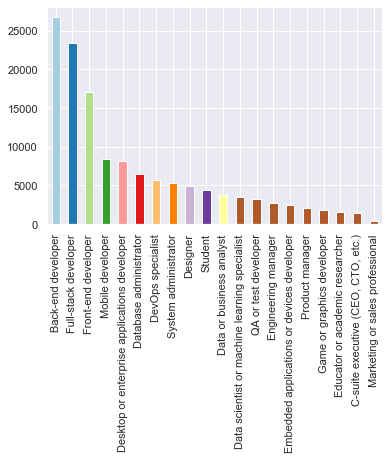

In [17]:
plotting_dev_type(global_dev_type_2018)

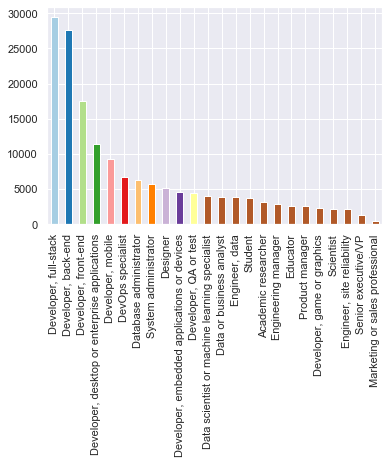

In [18]:
plotting_dev_type(global_dev_type_2019)

We can observe that in year 2018 Back-end developers were at the most while in 2019 Full-stack developers were the most surpassing Back-end developers.

### Now we will first analyze what type of Developer are most in the India

# What type of Developer are most in India?

In [19]:
def filter_country(df,country):
    '''
    Input:
    DataFrame, CountryName
    
    Function Description:
    Split the Dataset rows where country = country
    
    Output:
    Splitted DataFrame
    '''
    
    df_copy = df[df['Country']==country]
    
    return df_copy

In [20]:
india_dev_type_2018 = split_column(filter_country(df_2018,'India'),'DevType')
india_dev_type_2019 = split_column(filter_country(df_2019,'India'),'DevType')

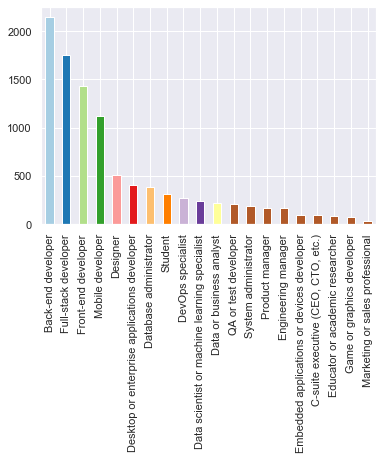

In [21]:
plotting_dev_type(india_dev_type_2018)

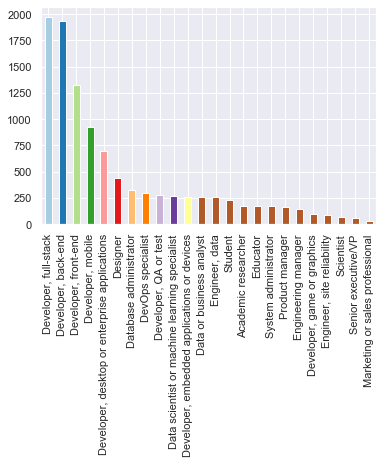

In [22]:
plotting_dev_type(india_dev_type_2019)

We can observe that the developer type ratio of India compared to the global Developer type ratio isn't much different. We can say that Indian developers ratio is same as that of global.

### Now, the next question which strikes our mind that: 

# Is developer type affects their salaries?

### or 

# Which Type of Developer get paid most?

Generally, we have use groupBy feature to find "which type of developer get paid most?".

But, in our case of data we have a slight issue with 'DevType' column which can be seen below.

In [23]:
df_2019.dropna().groupby(['DevType']).mean()['ConvertedComp']

DevType
Academic researcher                                                                                                                                                                                                                                                                                                                                                                                                                                                                        105150.601695
Academic researcher;Data or business analyst                                                                                                                                                                                                                                                                                                                                                                                                                                               108599.142857
Academic resea

Hence, for this we have to first split the dataset for every 'DevType' value separated by ';'

In [24]:
def split_column_value(ori_df, column_name, salary_column_name, separator=';'):
    '''
    INPUT - ori_df  - pandas dataframe -  original dataframe
            column_name - string - the name of the column you would like to splite the value
            separator - string - The is a delimiter. The string splits at this specified separator. If is not provided then ; is the separator.
    OUTPUT - 
            df - pandas dataframe - all value for the column of original dataframe
    '''
    ori_df = ori_df.dropna(subset=['DevType',salary_column_name])
    df = pd.DataFrame(ori_df[column_name].str.split(separator).tolist()).stack()
    return df

In [25]:
# splite the DevType colume value
temp1 = split_column_value(df_2018, 'DevType','ConvertedSalary')
devtype_2018 = pd.DataFrame(temp1).reset_index()
devtype_2018.head()

,level_0,level_1,0
0,0,0,Database administrator
1,0,1,DevOps specialist
2,0,2,Full-stack developer
3,0,3,System administrator
4,1,0,Data or business analyst


In [26]:
# splite the DevType colume value
temp1 = split_column_value(df_2019, 'DevType','ConvertedComp')
devtype_2019 = pd.DataFrame(temp1).reset_index()
devtype_2019.head()

,level_0,level_1,0
0,0,0,Designer
1,0,1,"Developer, back-end"
2,0,2,"Developer, front-end"
3,0,3,"Developer, full-stack"
4,1,0,"Developer, full-stack"


Now, we have created two data frames with DevType as attribute and level_0 as index which can be used for getting values from it's original dataframe.

Hence, using value of 'level_0' we will add one new column named 'ConvertedComp' which will store salary of each developer.

In [27]:
def add_salary_column(df,ori_df,salary_column_name):
    '''
    Input:
    df -> DataFrame in which we need to append new column of salary
    ori_df -> Original DataFram from which 'df' is extracted
    salary_column_name -> Name of salary column in ori_df
    
    Output:
    New DataFrame with ConvertedComp appended
    '''
    ori_df = ori_df.dropna(subset=['DevType',salary_column_name]).reset_index()
    ConvertedComp = []
    s = ori_df[salary_column_name]
    for index, row in df.iterrows():
        
        ConvertedComp.append(s[row['level_0']])
        
    df['ConvertedComp']=ConvertedComp
    return df

In [28]:
devtype_2018_salary = add_salary_column(devtype_2018,df_2018,'ConvertedSalary')
devtype_2018_salary.head()

,level_0,level_1,0,ConvertedComp
0,0,0,Database administrator,70841.0
1,0,1,DevOps specialist,70841.0
2,0,2,Full-stack developer,70841.0
3,0,3,System administrator,70841.0
4,1,0,Data or business analyst,21426.0


In [29]:
devtype_2019_salary = add_salary_column(devtype_2019,df_2019,'ConvertedComp')
devtype_2019_salary.head()

,level_0,level_1,0,ConvertedComp
0,0,0,Designer,8820.0
1,0,1,"Developer, back-end",8820.0
2,0,2,"Developer, front-end",8820.0
3,0,3,"Developer, full-stack",8820.0
4,1,0,"Developer, full-stack",61000.0


Now, we have processed our data into correct format and can be used to plot using groupBy function

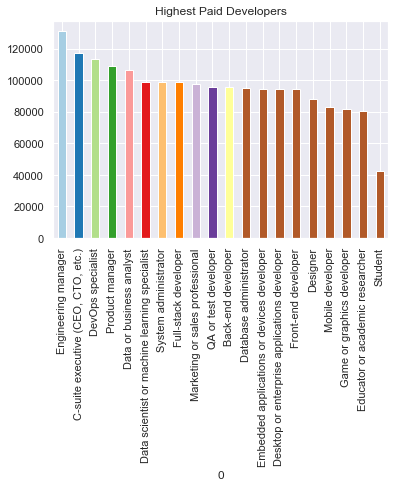

In [30]:
devtype_2018_salary.groupby(0).ConvertedComp.mean().sort_values(ascending=False).plot(kind='bar',title="Highest Paid Developers",color=plt.cm.Paired(np.arange(len(df_2018))));

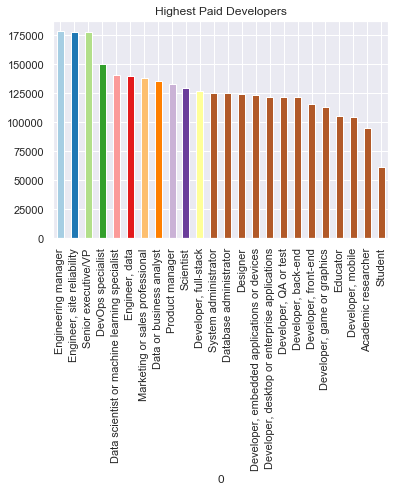

In [31]:
devtype_2019_salary.groupby(0).ConvertedComp.mean().sort_values(ascending=False).plot(kind='bar',title="Highest Paid Developers",color=plt.cm.Paired(np.arange(len(df_2019))));

Here, we can observe that if we leave the top 3 management positions we can see that the most paid developer skills are among DevOps specialist, Data Scientist or machine learning specialist or data engineer.

Which is almost as similar to 2018 except the Business Analyst role, that signifies that companies are starting to adopt data science to almost every aspect and there has been a grow of advance data science techniques like machine learning and deep learning.

### Well now concluding the analysis of the StackOverflow's survery with one of the most interesting question that

# Which programming language is hyped among developers?

In [32]:
def split_column_language(df,c_name):
    '''
    Input : 
    df -> Original Dataframe
    c_name -> column name which need's to be splitted
    
    Output:
    
    column_series -> Value of splitted column with ';' separator stored in pandas series
    '''
    df_copy = df
    column_series = df_copy[c_name].apply(lambda x: str(x).split(';'))
    
    return column_series

In [33]:
def plot_split_column_language(cs):
    '''
    Input:
    Column series of the splitted data
    
    Output:
    Bar plot of the value counts of different categories in cs
    '''
    obj = []
    for row in cs:
        for o in row:
            obj.append(o)

    pd.Series(obj).value_counts().nlargest(n=10).plot(kind='bar',title="Programming language",color=plt.cm.Paired(np.arange(len(df_2019))))

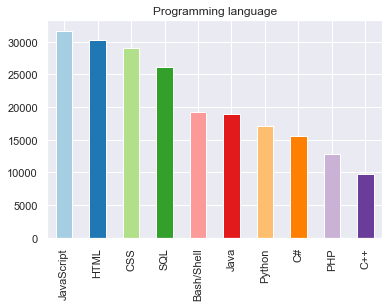

In [34]:
plot_split_column_language(split_column_language(df_2018,'LanguageWorkedWith'))

We can clearly see the hype of top 10 programming languages in the graph above for the year 2018.

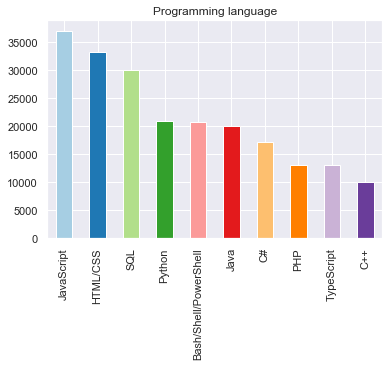

In [35]:
plot_split_column_language(split_column_language(df_2019,'LanguageWorkedWith'))

We can clearly see the hype of top 10 programming languages in the graph above for the year 2019.

Though a notable difference that we can see is Python is more famous than Java in the year 2019.

# What about what developers desire to learn next year?

Let's explore it and see what happens.

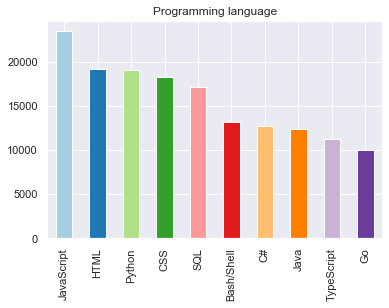

In [36]:
plot_split_column_language(split_column_language(df_2018,'LanguageDesireNextYear'))

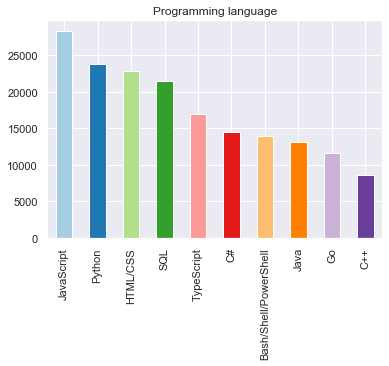

In [37]:
plot_split_column_language(split_column_language(df_2019,'LanguageDesireNextYear'))

We can observe that in 2018 people wanted to learn JavaScript and Python which resulted in growth of Python in year 2019.

In year 2019 the top 5 scheme and desire remains the same. But on a note we can see the increase in desire to learn 'Go' is also increasing slowly which can suggest future era of 'Go' language.